In [6]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import os
import sys
import cv2
import imutils
from glob import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of helper failed: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 369, in superreload
    module = reload(module)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\ProgramData\Anaconda3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../scripts\helper.py", line 203
    def model_saver(path="./

# Import self written files

In [7]:
sys.path.insert(0, '../scripts')

import helper as hp
import selenium_scrapeImages as sc
# import GAN_2D as gan2
import pix2pix as p2p
import gan as GANS
import deconvolution as deco

In [8]:
searchterm = 'onion_cell'
num_images = 500

# sc.scrapeImages(searchterm=searchterm, number_images=num_images)

# Load and assign data

In [9]:
category = 'onion_cell'
s = 128
squared_img_size = (128,128)

In [10]:
path = '../data/2D/google_search_images/'+category

images_original_train = hp.load_tranfer_images(path=path+'/train',squared_img_size=s)
images_original_test = hp.load_tranfer_images(path=path+'/test',squared_img_size=s)

print('shape train images: ', images_original_train.shape)
print('shape test images: ', images_original_test.shape)

shape train images:  (105, 16384)
shape test images:  (46, 16384)


In [11]:
images_gaussian_5_train = hp.create_blurred_images(input_images=images_original_train,
                             noise='gaussian', squared_img_size=128, k_size=5)
images_gaussian_5_test = hp.create_blurred_images(input_images=images_original_test,
                             noise='gaussian', squared_img_size=128, k_size=5)

print('shape train images blurred: ', images_gaussian_5_train.shape)
print('shape test images blurred: ', images_gaussian_5_test.shape)

shape train images blurred:  (105, 16384)
shape test images blurred:  (46, 16384)


In [12]:
# images_blur_box_5 = hp.create_blurred_images(input_images=images_original,
#                              noise='box', squared_img_size=128, k_size=5)

# images_blur_box_5.shape

### combine original and blurred images

In [13]:
# images = np.empty((0, np.square(s)))

# images = np.concatenate((images_original_train, images_gaussian_5_train)) 

# images.shape

# Look for a random (blurred) psf-image

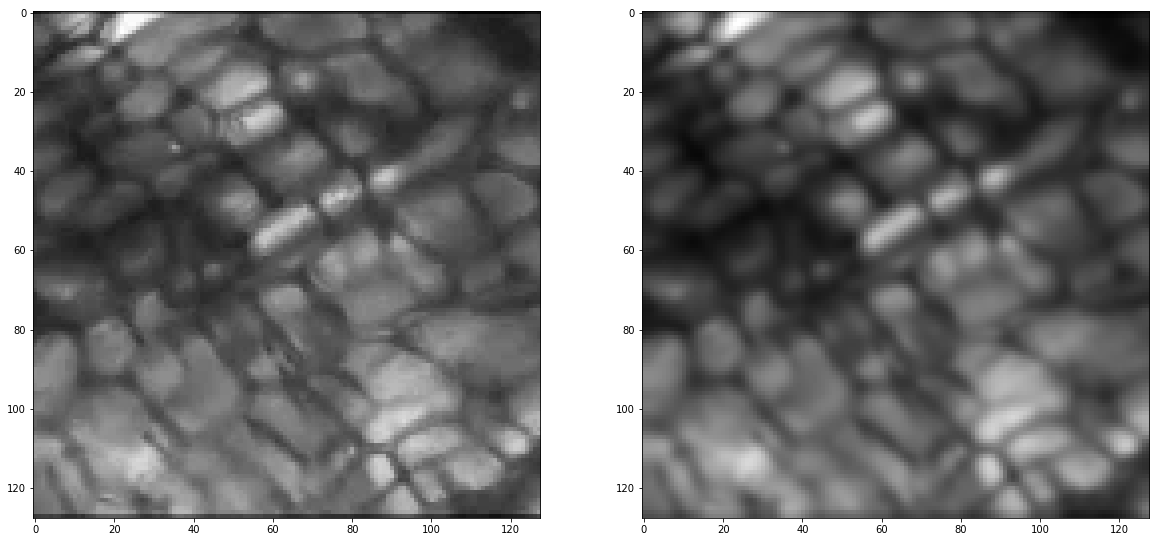

img sizes:  (128, 128) (128, 128)


In [14]:
random_number = random.randint(0,images_original_train.shape[0])

img = images_original_train[random_number].reshape(squared_img_size)
img_blur_gaussian = images_gaussian_5_train[random_number].reshape(squared_img_size)

plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(img, cmap='gray')
plt.subplot(122); plt.imshow(img_blur_gaussian, cmap='gray')
plt.show()

print('img sizes: ', img.shape, img_blur_gaussian.shape)

# GAN

In [15]:
# gan = GANS.GAN(squared_img_size=128)

In [16]:
data = images_original_train.copy()
data = np.reshape(data, (data.shape[0],)+squared_img_size)
print(data.shape)

# gan.train(X_train=data, epochs=600, batch_size=10, sample_interval=60)

(105, 128, 128)


# Pix2Pix GAN

In [17]:
gan_pix2pix = p2p.Pix2Pix(squared_img_size=s, d_name='onion_cell')

finish Pix2Pix __init__


In [18]:
# gan_pix2pix.train(epochs=30, batch_size=32, sample_interval=100)

discriminator, generator, combined = gan_pix2pix.train(epochs=3, batch_size=16, sample_interval=32)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):
C:\ProgramData\Anaconda3\lib\site-packages\keras-2.1.5-py3.6.egg\keras\engine\training.py:975: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


[Epoch 0/3] [Batch 0/6] [D loss: 2.797909, acc:  25%] [G loss: 83.382713] time: 0:00:09.371929
[Epoch 0/3] [Batch 1/6] [D loss: 4.109931, acc:  22%] [G loss: 73.494286] time: 0:00:10.481659
[Epoch 0/3] [Batch 2/6] [D loss: 3.047403, acc:  24%] [G loss: 60.110592] time: 0:00:11.486985
[Epoch 0/3] [Batch 3/6] [D loss: 2.066403, acc:  29%] [G loss: 51.279648] time: 0:00:12.789123
[Epoch 0/3] [Batch 4/6] [D loss: 2.610724, acc:  23%] [G loss: 43.712688] time: 0:00:13.963393
[Epoch 1/3] [Batch 0/6] [D loss: 1.883848, acc:  36%] [G loss: 39.891159] time: 0:00:15.583258
[Epoch 1/3] [Batch 1/6] [D loss: 1.369776, acc:  32%] [G loss: 41.335411] time: 0:00:16.530802
[Epoch 1/3] [Batch 2/6] [D loss: 1.418299, acc:  27%] [G loss: 51.610050] time: 0:00:17.363616
[Epoch 1/3] [Batch 3/6] [D loss: 3.296807, acc:  27%] [G loss: 34.508781] time: 0:00:18.439225
[Epoch 1/3] [Batch 4/6] [D loss: 2.119656, acc:  31%] [G loss: 28.874527] time: 0:00:19.519274
[Epoch 2/3] [Batch 0/6] [D loss: 1.886482, acc:  3

## Save models and parameters

In [26]:
hp.model_saver(model_instance=discriminator)

model_saver: propably the folder already exists:  ./../models/2018_5_16
model_saver: model successfully saved in:  ./../models/2018_5_16/17_49_46.json
model_saver: model successfully saved in:  ./../models/2018_5_16/17_49_46.h5


TypeError: Image data cannot be converted to float

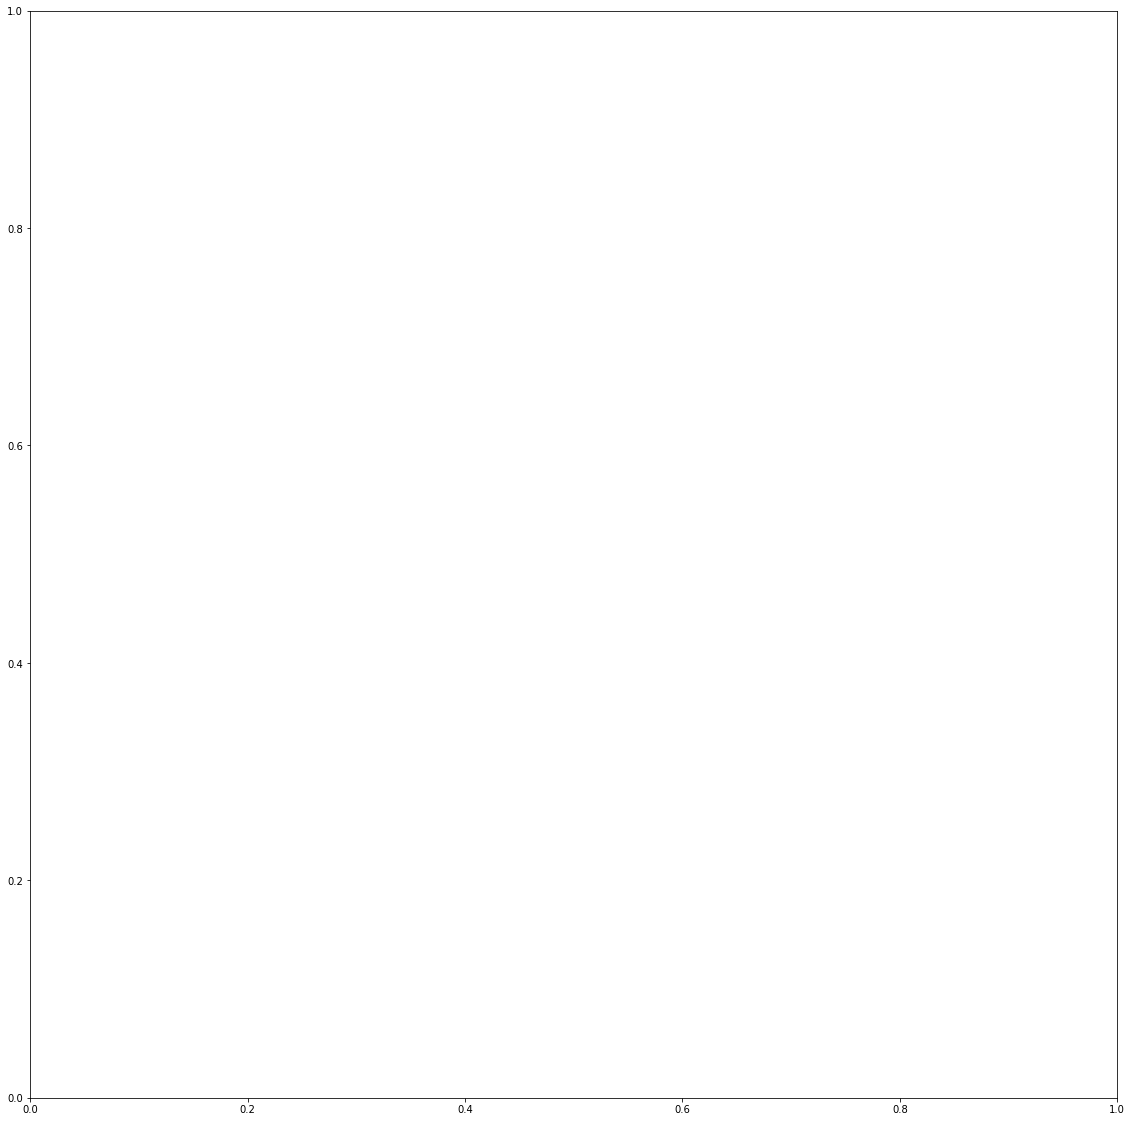

In [20]:
path = glob('images/%s/*' % (category))
random_img_path = np.random.choice(path, size=1)[0]
random_img = cv2.imread(random_img_path, 0)

%matplotlib qt5
plt.figure(figsize = (20,20))
plt.imshow(random_img, cmap='gray')
plt.show()

In [58]:
%matplotlib inline

# Pix3Pix GAN

# Deconvolution

In [ ]:
# kernel = deco.blur_edge(img)
# kernel = deco.motion_kernel(100, 50)
kernel = deco.defocus_kernel(100)

img_deconv = deco.wiener_filter(img, kernel=kernel)

print(img_deconv, set(img_deconv[64]))

# plt.imshow(img_deconv)

In [ ]:
from skimage import color, data, restoration
img_t = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d

plt.imshow(img_t, cmap='gray')

In [ ]:
import scipy.stats as st
def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

plt.imshow(gkern(5,5), interpolation='none')
kernel = gkern(5,9) 
np.sum(kernel)

In [ ]:
# psf = np.ones((5, 5)) / 25
psf = kernel
img_t = convolve2d(img_t, psf, 'same')
plt.imshow(img_t, cmap='gray')

In [ ]:
img_t += 0.1 * img_t.std() * np.random.standard_normal(img_t.shape)
# deconvolved_img = restoration.wiener(img_t, psf, 1100)
deconvolved = restoration.wiener(img_t, psf, 1, clip=False)

plt.imshow(deconvolved, cmap='gray')

In [ ]:
deconvolved_t = deco.unsupervised_wiener(img_t, psf)

plt.imshow(deconvolved_t, cmap='gray')